# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 1: Classic Mean Risk Optimization

## 1. Downloading the data:

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
# start = '2016-01-01'
# end = '2019-12-30'

# Tickers of assets
assets = [x+".NS" for x in list(pd.read_csv("ind_nifty50list.csv")["Symbol"])]
assets.sort()

# Downloading data
data = yf.download(assets)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  50 of 50 completed


In [ ]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-20,2.4266%,-0.5861%,0.4503%,-0.4226%,0.5070%,1.0961%,0.8538%,1.0015%,-0.1722%,0.0893%,...,0.0097%,5.7715%,0.2845%,0.1355%,-0.1422%,-1.5994%,-0.2989%,-2.0096%,0.6490%,-0.2710%
2017-11-21,-4.3329%,0.5519%,4.5489%,-0.5187%,0.3027%,1.7967%,0.6311%,0.2493%,2.1516%,1.3975%,...,4.0414%,-0.6366%,0.2955%,1.3103%,-1.1282%,3.5759%,4.0181%,-0.4281%,3.5121%,-0.1189%
2017-11-22,2.8348%,3.4182%,3.7642%,1.2066%,-1.1522%,0.3924%,-0.5734%,-1.9782%,-0.8246%,-0.7429%,...,-0.5204%,0.3295%,1.0253%,-0.0422%,0.2881%,-2.2780%,-0.2820%,1.6093%,-0.9808%,0.1020%
2017-11-23,-3.3587%,-1.7853%,-0.8656%,-1.2518%,0.6753%,-1.4654%,-0.8259%,-0.5806%,-0.5510%,-0.5023%,...,1.7749%,0.2737%,-0.5483%,0.2320%,0.0224%,1.4505%,-0.8916%,-1.0697%,0.2811%,-0.2549%
2017-11-24,0.4918%,-0.6141%,0.4958%,0.0000%,0.2481%,0.7244%,0.5260%,1.4941%,0.0907%,1.1581%,...,0.8720%,1.4192%,-0.1759%,-0.5963%,0.2536%,0.9191%,2.9036%,1.3417%,-0.6874%,-0.2896%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [ ]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
weights,1.3927%,0.0000%,0.0000%,0.5136%,0.0000%,0.0000%,0.0000%,8.3143%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,14.4096%,2.7357%,0.0000%,0.0000%,0.0000%,0.0000%


### 2.2 Plotting portfolio composition

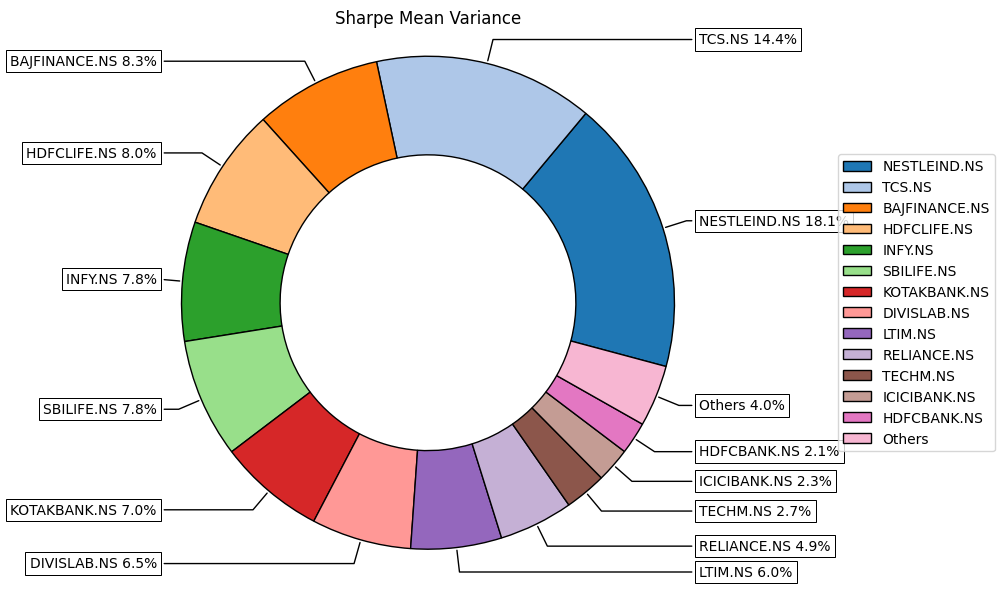

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)